In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

sns.set_style("white")
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [77]:
cust = pd.read_csv("customer_data.csv")
cust.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


### EDA

In [78]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [79]:
cust.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [80]:
cust.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [81]:
cust.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

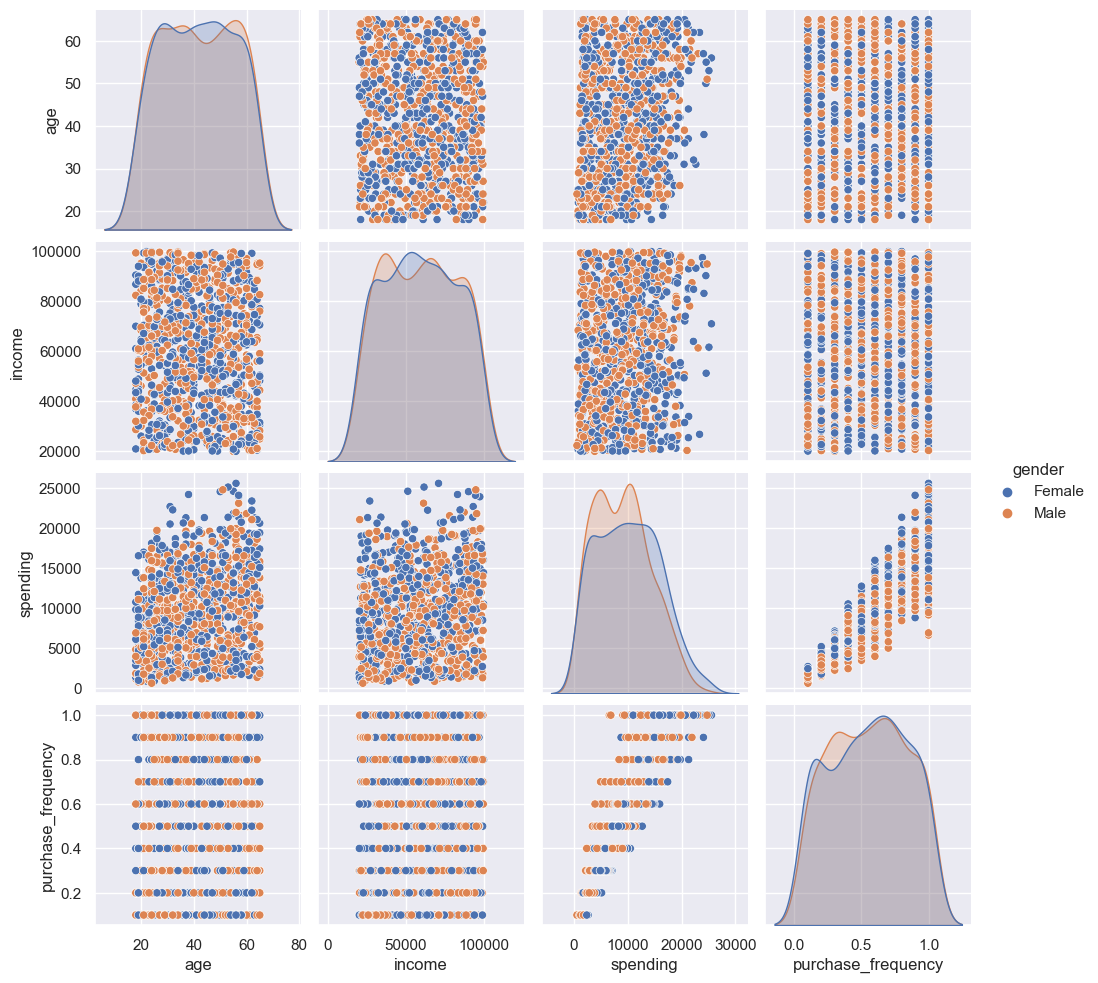

In [82]:
sns.set(rc = {"figure.figsize":(5,2.5)})

sns.pairplot(cust, vars=['age','income','spending', 'purchase_frequency'],hue='gender',)

Text(0.5, 1.0, 'Distribusi Umur Customer')

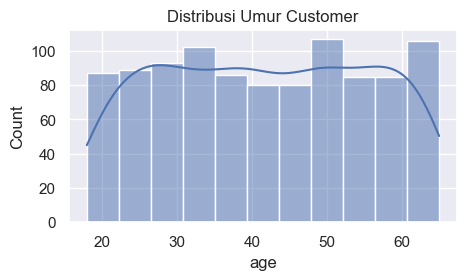

In [83]:
sns.histplot(cust.age, kde=True)
plt.title("Distribusi Umur Customer")

Text(0.5, 1.0, 'Distribusi Pengeluaran Customer')

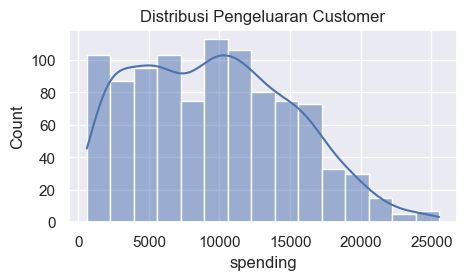

In [84]:
sns.histplot(cust.spending, kde=True)
plt.title("Distribusi Pengeluaran Customer")

Text(0.5, 1.0, 'Distribusi Pendapatan Customer')

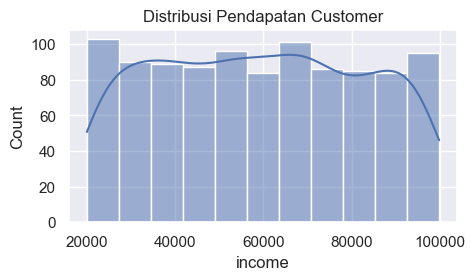

In [85]:
sns.histplot(cust.income, kde=True)
plt.title("Distribusi Pendapatan Customer")

Text(0.5, 1.0, 'Distribusi Pendapatan berdasarkan Pendidikan')

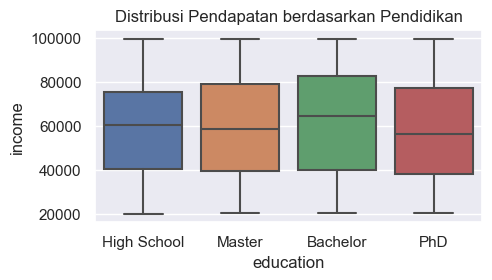

In [86]:
sns.boxplot(x=cust.education,y=cust.income)
plt.title("Distribusi Pendapatan berdasarkan Pendidikan")

Text(0.5, 1.0, 'Distribusi Pengeluaran berdasarkan Pendidikan')

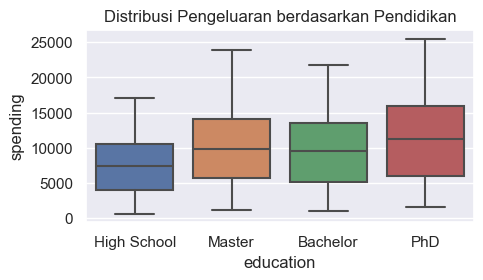

In [87]:
sns.boxplot(x=cust.education,y=cust.spending)
plt.title("Distribusi Pengeluaran berdasarkan Pendidikan")

Text(0.5, 1.0, 'Distribusi Pemasukan berdasarkan Gender')

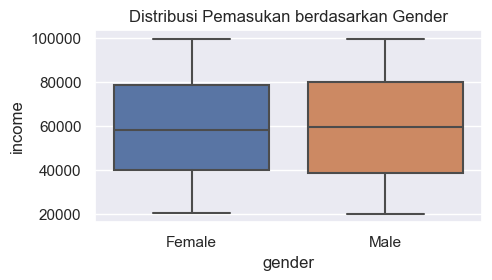

In [88]:
sns.boxplot(x=cust.gender,y=cust.income)
plt.title("Distribusi Pemasukan berdasarkan Gender")

Text(0.5, 1.0, 'Distribusi Pengeluaran berdasarkan Gender')

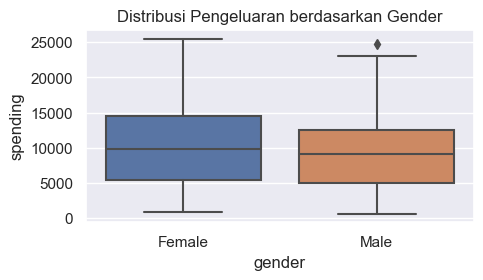

In [89]:
sns.boxplot(x=cust.gender,y=cust.spending)
plt.title("Distribusi Pengeluaran berdasarkan Gender")

Text(0.5, 1.0, 'Distribusi Pengeluaran berdasarkan purchase frequency')

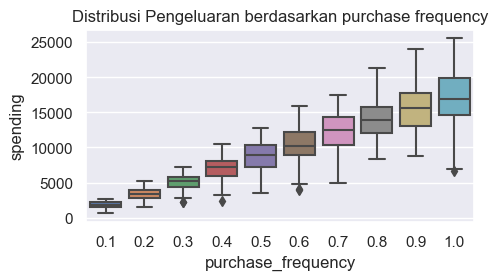

In [90]:
sns.boxplot(x=cust.purchase_frequency,y=cust.spending)
plt.title("Distribusi Pengeluaran berdasarkan purchase frequency")

Text(0.5, 1.0, 'Distribusi Pendapatan berdasarkan purchase frequency')

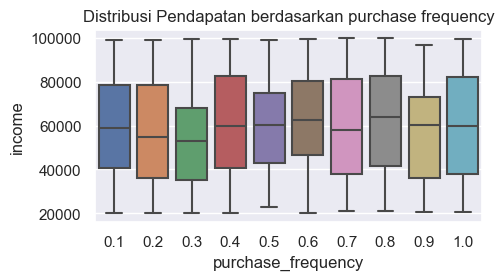

In [91]:
sns.boxplot(x=cust.purchase_frequency,y=cust.income)
plt.title("Distribusi Pendapatan berdasarkan purchase frequency")

### Preprocessing Data

#### Cek data yang Null

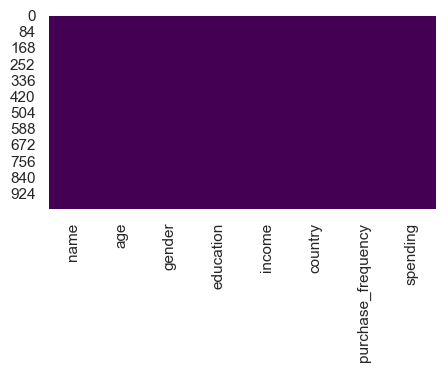

In [92]:
sns.heatmap(cust.isnull(), cbar=False, cmap='viridis')
plt.show()

In [93]:
cust.isnull().any().any()

False

### Drop Kolom yang tidak diperlukan

In [94]:
cust.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [95]:
cust = cust.drop('name', axis=1)
cust = cust.drop('country', axis=1)
cust.head()

,age,gender,education,income,purchase_frequency,spending
0,42,Female,High School,53936,0.9,13227.120
1,49,Female,Master,82468,0.6,12674.040
2,55,Male,Bachelor,56941,0.3,5354.115
3,24,Female,Bachelor,60651,0.2,2606.510
4,64,Male,Master,81884,0.9,18984.780


In [96]:
cust_norm = cust.join(pd.get_dummies(cust.education)).drop('education',axis=1)
cust_norm = cust_norm.join(pd.get_dummies(cust.gender)).drop('gender',axis=1)
cust_norm.head()

,age,income,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male
0,42,53936,0.9,13227.120,False,True,False,False,True,False
1,49,82468,0.6,12674.040,False,False,True,False,True,False
2,55,56941,0.3,5354.115,True,False,False,False,False,True
3,24,60651,0.2,2606.510,True,False,False,False,True,False
4,64,81884,0.9,18984.780,False,False,True,False,False,True


### Melakukan Normalisasi Data menggunakan StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler
X = cust_norm.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.22978925,  1.21392036,  0.6592205 , ..., -0.57427105,
         1.002002  , -1.002002  ],
       [ 0.99756538,  0.15955988,  0.55832966, ..., -0.57427105,
         1.002002  , -1.002002  ],
       [-0.10052384, -0.89480059, -0.77694449, ..., -0.57427105,
        -0.998002  ,  0.998002  ],
       ...,
       [ 0.02280526, -0.5433471 , -0.44092533, ..., -0.57427105,
        -0.998002  ,  0.998002  ],
       [-0.04326851,  0.51101338,  0.78917392, ..., -0.57427105,
         1.002002  , -1.002002  ],
       [-1.15138063, -0.19189361, -0.23723191, ..., -0.57427105,
         1.002002  , -1.002002  ]])

### Modeling

In [98]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 2 1 2 0 1 0 2 2 0 2 2 0 0 0 2 2 1 0 1 0 2 0 0 0 0 0 1 2 0 0 1 0 1
 2 0 2 2 1 0 2 0 0 0 0 0 0 0 1 0 1 0 0 2 2 1 0 0 1 1 2 2 1 2 0 1 0 1 2 0 2
 0 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 0 0 1 1 0 2 1 2 0 0 1 1 1 0 2 0 1 0 0 0 0
 1 1 1 0 1 0 1 1 2 2 0 1 0 0 2 1 1 0 0 0 2 0 1 0 0 2 0 0 1 0 2 1 0 2 1 2 0
 0 2 2 1 1 0 0 1 2 2 2 2 2 1 2 0 1 1 2 1 0 0 2 0 1 1 1 0 2 1 2 1 0 1 2 2 1
 1 1 0 0 0 2 1 1 2 1 1 0 0 2 2 2 2 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 2 2 0 1 0
 1 0 2 1 0 2 0 2 0 2 1 0 0 0 0 2 1 1 0 2 2 1 2 1 1 0 1 0 1 1 2 0 0 0 0 0 1
 0 2 0 1 2 0 0 2 2 0 2 0 0 1 0 0 2 1 0 0 1 2 0 0 1 2 1 0 0 1 0 2 2 0 2 2 0
 0 0 2 1 2 2 1 0 0 0 0 2 1 2 2 1 1 0 0 0 0 2 1 1 2 1 1 0 2 0 0 0 1 0 2 1 0
 2 1 1 1 0 1 0 0 0 2 0 1 2 2 0 1 1 1 1 0 0 1 1 1 2 0 1 0 1 0 2 2 1 1 2 2 0
 0 2 2 0 1 1 1 2 2 1 2 0 0 2 1 2 2 1 0 2 1 1 2 1 2 1 2 2 0 0 0 0 1 1 0 2 0
 0 0 1 1 2 0 1 2 0 1 0 1 2 1 0 2 1 0 1 0 1 1 1 1 2 2 1 0 2 1 2 1 2 0 1 0 2
 0 0 1 0 0 1 0 1 0 1 2 2 2 1 1 2 2 1 1 0 1 0 0 1 0 2 2 2 1 2 2 2 0 2 1 0 0
 1 0 2 1 2 0 1 2 0 0 0 1 

In [99]:
cust_norm["Clus_km"] = labels
cust_norm.head(5)

,age,income,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male,Clus_km
0,42,53936,0.9,13227.120,False,True,False,False,True,False,1
1,49,82468,0.6,12674.040,False,False,True,False,True,False,2
2,55,56941,0.3,5354.115,True,False,False,False,False,True,1
3,24,60651,0.2,2606.510,True,False,False,False,True,False,1
4,64,81884,0.9,18984.780,False,False,True,False,False,True,2


### Insights

In [100]:
cust_norm.groupby('Clus_km').mean()

,age,income,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male
Clus_km,,,,,,,,,,
0,42.371105,33302.968839,0.537394,8740.723003,0.263456,0.223796,0.246459,0.266289,0.487252,0.512748
1,41.543662,61478.526761,0.560000,9686.293944,0.236620,0.287324,0.225352,0.250704,0.521127,0.478873
2,41.263699,88003.517123,0.568836,10579.408442,0.321918,0.219178,0.236301,0.222603,0.486301,0.513699


ValueError: s must be a scalar, or float array-like with the same size as x and y

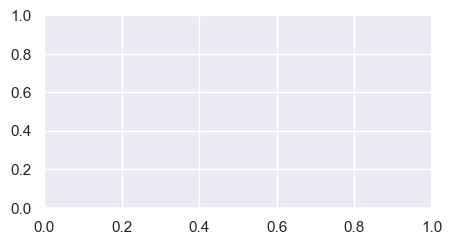

In [144]:
import numpy as np
import matplotlib.pyplot as plt

area = np.pi * (X[:, 1]) ** 2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

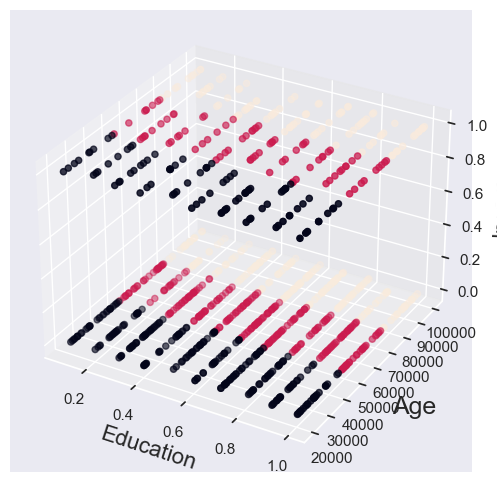

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Education', fontsize=16)
ax.set_ylabel('Age', fontsize=18)
ax.set_zlabel('Income', fontsize=16)

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))

## K-Means

In [103]:
from sklearn.cluster import KMeans

X_cust = cust_norm[['income', 'spending']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cust)
cust_norm['label'] = kmeans.labels_

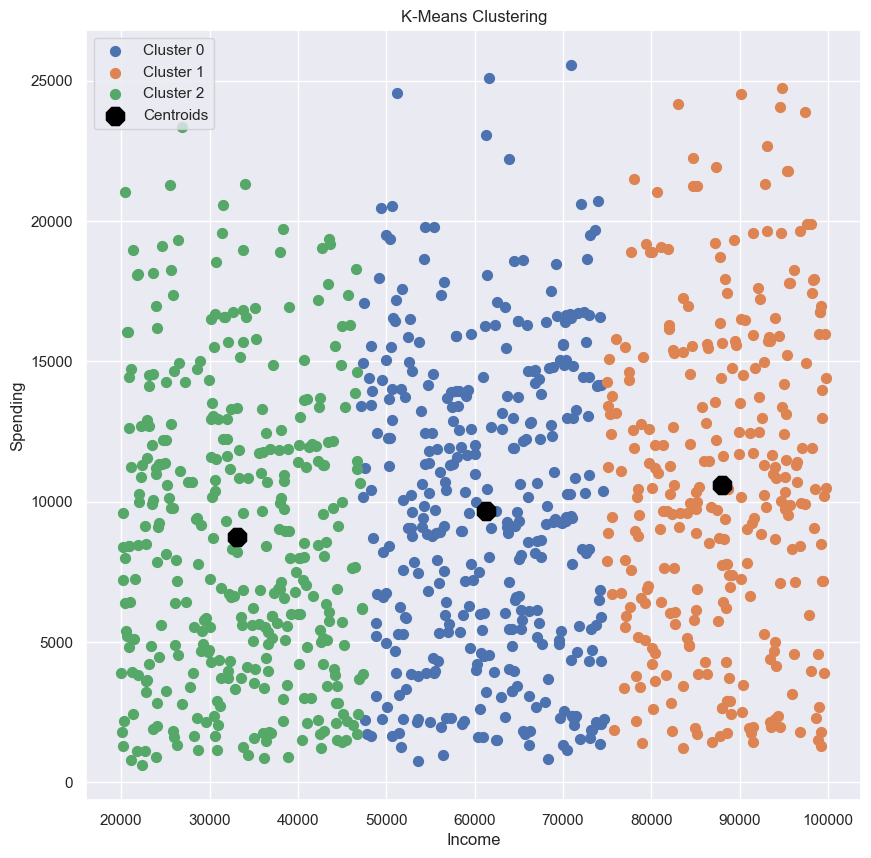

In [104]:
# Visualisasi classess and scatterplot
plt.figure(figsize=(10, 10))

for label in cust_norm['label'].unique():
    plt.scatter(X_cust.loc[cust_norm['label'] == label, 'income'],
               X_cust.loc[cust_norm['label'] == label, 'spending'],
               label=f'Cluster {label}', s=50)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=200, c='black', marker='8', label='Centroids')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

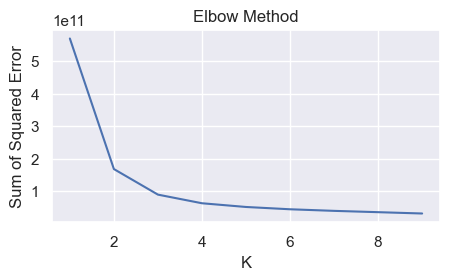

In [105]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(cust_norm)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')
plt.plot(k_range,sse)

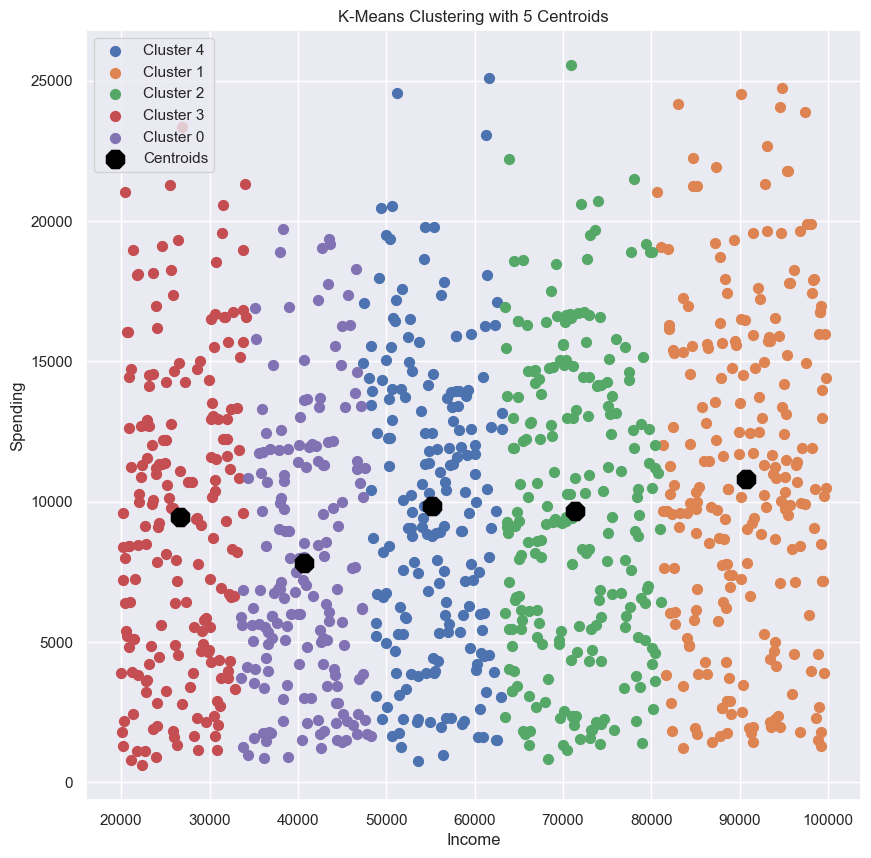

In [106]:
clusterNum = 5
kmeans = KMeans(n_clusters=clusterNum, random_state=42)
kmeans.fit(X_cust)

cust_norm['label'] = kmeans.labels_

plt.figure(figsize=(10, 10))

for label in cust_norm['label'].unique():
    plt.scatter(cust_norm.loc[cust_norm['label'] == label, 'income'],
                cust_norm.loc[cust_norm['label'] == label, 'spending'],
                label=f'Cluster {label}', s=50)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='8', label='Centroids')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('K-Means Clustering with 5 Centroids')
plt.legend()
plt.show()

## hierarchical clusterin


In [151]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

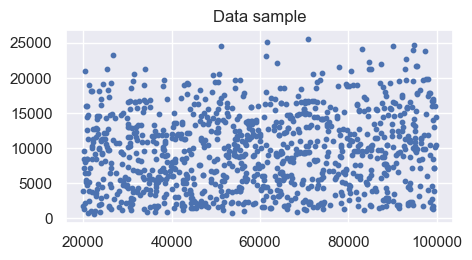

In [162]:
plt.scatter(X[:, 0], X[:, 2], s=10)
plt.title("Data sample")
plt.show()

In [163]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X)

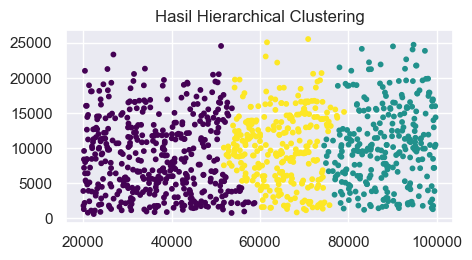

In [164]:
plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='viridis', s=10)
plt.title("Hasil Hierarchical Clustering")
plt.show()

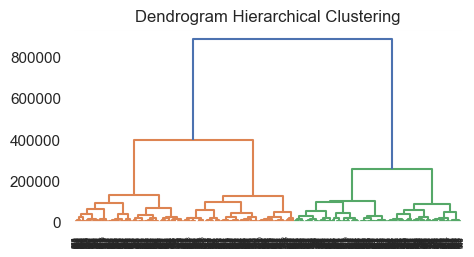

In [165]:
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram Hierarchical Clustering')
plt.show()